# Week 1- Program Design in Python

## Lab Session

__Solutions__: Exercise 1 and Exercise 2



## Exercise 1

Write a program that converts an assignment's rubric into a grade, based on the grade scale of the course. Level 4 and Level 7 student rubrics must be converted based on the Level 4 and Level 7 grade scale, respectively. Your program should return both the numerical and text grade (e.g. `(68, '2:1')` or `(68, 'High Merit')`).

### Assumptions

1. There are one or more assessment criteria (e.g. _correctness_, _visualisation_ and so on).
2. Each criterion has a maximum score (e.g. 20 for _correctness_, 10 for _visualisation_ and so on).
3. Scores are non-negative integers (i.e., 0, 1, 2 and so on, until maximum).
4. The scores of all criteria sum up to 100.

| Criterion | Score |
| :-------- | ----: |
| C.1.1 |        10 |
| C.1.2 |        20 |
| C.2.0 |        30 |
| C.3.0 |        40 |

5. A student is characterised by full name (name surname), student id, and level.

| Name           |  Id  | Level | C.1.1 | C.1.2 | C.2.0 | C.3.0 |
| :--------------|:----:|:-----:|-----: |-----: |-----: |-----:|
| Michael Jackson | A123 |   4   |    10 |    17 |    25 |    30 |

For example, Michael has scored 82 out of 100. The closest grade in the L4 scale is 80. Your program should return both the numerical and text grade, e.g. `(80, '1st')`.

In [1]:
def convertGrade(student, rubric):
    result = None
    # Your solution
    return result


criteria = [30, 20, 30, 40]
student = ['Michael Jackson', '1234', '4', 10, 15, 25, 30]
result = convertGrade(student, criteria)
print(result)


None


__Exercise 1B__ What modifications are required if we relax assumption 4?

__Exercise 1C__ What if criteria scores are negative numbers, counting against the overall mark?

## Exercise 2

Reuse the above program to convert to mark multiple students, not just one. Student records are stored in a file.

| Name                                                       |  Id  | Level | C.1.1 | C.1.2 | C.2.0 | C.3.0 |
| :----------------------------------------------------------|:----:|:-----:|------:|------:|------:|------:|
| Michael Jackson                                             | A123 |   4   |    10 |    17 |    25 |    30 |
| Will Smith                                                 | A124 |   7   |     8 |    19 |    25 |    35 |
| [Ada Lovelace](https://en.wikipedia.org/wiki/Ada_Lovelace) | B127 |   7   |    10 |    20 |    30 |    40 |

Plot results, in descenting order - student name on the $y$-axis, numerical mark on the $x$-axis.

In [12]:
def convertAllGrades(filename, rubric):
    results = None
    # Your solution
    return results


def summary(results, k=None):
    """
    It prints the top-K performing students.
    """
    # Try coding something like the following
    fmt = "{:15s} {:3d} or {}"
    print(fmt.format("Ada Lovelace",  100, 'Highest distinction'))
    print(fmt.format("Will Smith",     85, 'Very high distinction'))
    print(fmt.format("Michael Jackson", 80, '1st'))


criteria = [25, 25, 25, 25]
filename = 'grades.csv'
results = convertAllGrades(filename, criteria)
summary(results)

Ada Lovelace    100 or Highest distinction
Will Smith       85 or Very high distinction
Michael Jackson  80 or 1st


## Exercise 2B

How many students got a mark between 72-100, 62-68, 52-58, 0-48? Do some research on how to Plot a histogram. (<i class="fa fa-coffee"></i>)


## Exercise 2C

How well did students perform per grading criterion? (<i class="fa fa-coffee"></i><i class="fa fa-coffee"></i>)

## Solution

With regards to data structures, there are two main questions:

(1) How to represent a student record?

(2) How to represent a grade scale?

Let's start with the first one, i.e. student records. In this example, I am using a `namedtuple`.

In [13]:
from collections import namedtuple

# Each student record has four attributes:
#
# 1) Full name
# 2) A unique identifier
# 3) Level (e.g. 4 or 7)
# 4) A list of marks, one for each part of the assignment
#  TIP: See https://docs.python.org/3/library/collections.html
Student_t = namedtuple('Student', 'name id level marks')

### Exercise 1, Version 1

One way to represent a grade scale is using a __list of (named) tuples__.

In [14]:
Class_t = namedtuple('Class', 'description values')

_L4 = [    
    Class_t('Fail', [ 5, 20, 35]),
    Class_t('3rd',  [42, 45, 48]),
    Class_t('2:2',  [52, 55, 58]),
    Class_t('2:1',  [62, 65, 68]),
    Class_t('1st',  [72, 75, 80, 85, 90, 100])
]

_L7 = [
    Class_t('Fail',        [ 0,  5, 20, 35, 42,  48]),
    Class_t('Pass',        [52, 55, 58]),
    Class_t('Merit',       [62, 65, 68]),
    Class_t('Distinction', [72, 75, 80, 85, 90, 100])
]

We can now code the basic functionality of our program: mapping an integer mark to a class name and value in a given grade scale.

In [15]:
def _roundup(mark, low, high):
    """
    Rounds a mark between low and high to the closest value.
    """
    # Unlikely error
    assert mark > low and mark < high
    # Return the closet value
    return low if mark - low < high - mark else high


def _convert(mark, scale):
    """
    Maps an integer mark to a class name and value in the given grade scale.
    """
    # Unlikely error
    assert isinstance(mark, int) and not mark < 0
    # Keep a pointer to the previous class we encountered
    previous = None
    # Iterate over all class grades for a given level, in 
    # ascending order
    for cls in scale:
        
        # The minimum and maximum grade in this class
        minimum = min(cls.values)
        maximum = max(cls.values)
        
        # The case where a student mark does not belong in 
        # a particular class
        if mark < minimum:
            if not previous:
                return cls.description, minimum
            else:
                mark = _roundup(mark, max(previous.values), minimum)
                # Find the appropriate description
                description = cls.description if mark == minimum else previous.description
                return description, mark
        
        # The case where a student mark matches one of the 
        # possible grades in this class
        if mark in cls.values:
            return cls.description, mark
        
        # The case where a student mark belongs in this class,
        # but it does not match one of its possible grades
        if mark > minimum and mark < maximum:
            for i in range(1, len(cls.values) -1):
                if mark < cls.values[i]:
                    mark = _roundup(mark, cls.values[i-1], cls.values[i])
                    return cls.description, mark 

        # Move to next class, setting previous to current
        previous = cls
    
    # In the unlikely event that we haven't found
    # a solution in the grade scale, return None,
    # indicating an error
    return None

Let's code the rest of the program.

In [16]:
def _validate(marks, rubric):
    """
    Validates user inputs.
    """
    # A student should be assigned a mark
    # for every part of an assignment
    if len(marks) != len(rubric):
        raise ValueError(f"Invalid number of marks: "
                         f"expected {len(rubric)}, but {len(marks)} marks provided.")
    
    for x, y in zip(marks, rubric):

        # Student marks should be numerical values
        if not isinstance(x, (int, float)):
            raise TypeError(f"Invalid mark {x} of type '{type(x).__name__}'. "
                            "Expected an 'int' or 'float'.")
        
        # A rubric should contain numerical values
        if not isinstance(y, (int, float)):
            raise TypeError(f"Invalid mark {y} of type '{type(y).__name__}'. "
                            "Expected an 'int' or 'float'.")
        
        # A student's mark cannot exceed the maximum score
        if abs(x) > y:
            raise ValueError(f"Invalid mark: {x} out of {y}")
    return


def _rint(x):
    """
    Rounds a floating point number to the nearest integer.
    """
    if isinstance(x, int):
        return x
    i = int(x)
    return (i + 1) if x >= float(i + 0.5) else i


def _sumup(marks, rubric):
    """
    Computes the sum of all marks, normalised to 100.
    """
    # Student's overall score
    score = 0
    # Highest possible score
    maxim = sum(rubric)
    # Sum up all parts, taking into account negative marks
    for i, part in enumerate(marks):
        if part < 0:
            score += rubric[i] - part 
        else:
            score += part

    # Normalize mark out of 100
    score = (score / maxim) * 100.
    
    # Round up (to the nearest integer)
    return _rint(score)
    

def convertGrade(student, rubric):
    """
    Returns the class and final grade of a student
    according to NCH's grade scales.
    """
    # Validate student marks & the rubric
    _validate(student.marks, rubric)
    
    # Compute student's overall score (out of 100)
    score = _sumup(student.marks, rubric)
    
    # Convert score according to grade scale
    result = _convert(score, _L4 if student.level == '4' else _L7)
    
    # Unlikely, but fatal error
    assert result is not None
    return result


# Main application logic
student = Student_t('Ada Lovelace', 'B127', '7', [10, 20, 30, 40]) 

result = convertGrade(student, [10, 20, 30, 40])
print(result)

('Distinction', 100)


### Exercise 1, Version 2

Another way to represent a grade scale is using a __dictionary of (named) tuples, also known as a look-up-table or LUT, indexed by value__.

In [17]:
_L4 = {
      5: ('Fail', None),
     20: ('Fail', None),
     35: ('Fail', None),
     42: ('3rd',  None),
     45: ('3rd',  None),
     48: ('3rd',  None),
     52: ('2:2',  None),
     55: ('2:2',  None),
     58: ('2:2',  None),
     62: ('2:1',  None),
     65: ('2:1',  None),
     68: ('2:1',  None),
     72: ('1st',  None),
     75: ('1st',  None),
     80: ('1st',  None),
     85: ('1st',  None),
     90: ('1st',  None),
    100: ('1st',  None),
}

_L7 = {
      0: ('Fail',        'No attempt'),
      5: ('Fail',        'Almost no attempt'),
     20: ('Fail',        None),
     35: ('Fail',        'Clear'),
     42: ('Fail',        'Mid'),
     48: ('Fail',        'High'),
     52: ('Pass',        'Low'),
     55: ('Pass',        'Mid'),
     58: ('Pass',        'High'),
     62: ('Merit',       'Low'),
     65: ('Merit',       'Mid'),
     68: ('Merit',       'High'),
     72: ('Distinction', 'Low'),
     75: ('Distinction', 'Mid'),
     80: ('Distinction', 'High'),
     85: ('Distinction', 'Very high'),
     90: ('Distinction', 'Extremely high'),
    100: ('Distinction', 'Highest')
}

Besides the `_convert` function, the rest of the program remains the same.

In [18]:
def _convert(mark, scale):
    """
    Maps an integer mark to a class name and value in the given grade scale.
    """
    # Unlikely error
    assert isinstance(mark, int) and not mark < 0

    # Get list of possible grades, in ascending order
    values = sorted(list(scale.keys()))
    
    # The case where a student mark is not with range
    if mark < min(values):
        return scale[min(values)], min(values)
    
    # The case where a student mark matches one of the 
    # possible grades
    if mark in values:
        return scale[mark], mark
    
    # The case where a student mark is in between two
    # consecutive values
    for i in range(1, len(values) - 1):
        if mark < values[i]:
            mark = _roundup(mark, values[i-1], values[i])
            return scale[mark], mark
    
    # Ideally, an unreachable statement
    return None


def convertGrade(student, rubric):
    """
    """
    # Validate student marks & the rubric
    _validate(student.marks, rubric)
    
    # Compute student's overall score (out of 100)
    score = _sumup(student.marks, rubric)
    
    # Convert score according to grade scale
    result = _convert(score, _L4 if student.level == '4' else _L7)
    
    # Unlikely, but fatal error
    assert result is not None
    return result


# Main application logic
student = Student_t('Ada Lovelace', 'B127', '7', [10, 20, 30, 40])

result = convertGrade(student, [10, 20, 30, 40])
print(result)

(('Distinction', 'Highest'), 100)


### Exercise 2

In [19]:
def _load(filename):
    """
    Returns a list of student records from a file.
    """
    f = open(filename, 'r')
    students = []
    for line in f:
        # Split comma-separated values into a list
        s = line.split(',')
        # Besides the student's name, id and level, each student 
        # record should contain at least one mark
        assert len(s) > 3
        # Extract marks
        marks = [float(x) for x in s[3:]]
        
        students.append(Student_t(s[0].strip(),
                                  s[1].strip(),
                                  s[2].strip(),
                                  marks))
    return students


def convertAllGrades(filename, rubric):
    """
    Calls `convertGrade` for each student record.
    """
    table = []
    students = _load(filename)
    for student in students:
        # (class, subclass), mark
        description, mark = convertGrade(student, rubric)
        # Organise data in two-dimensional table
        table.append([student.name, student.level, mark, description[0], *student.marks])
    #table contains the data now for plotting it
    return table


# Main application logic
filename = 'grades.csv'
rubric = [25, 25, 25, 25]

table = convertAllGrades(filename, rubric)

Now that we have all students record in a table, we can create different views and plot them accordingly.

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt

# Configure fonts for all subsequent plots
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 16})

#### Exercise 2B - Finding the top-$k$ students

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

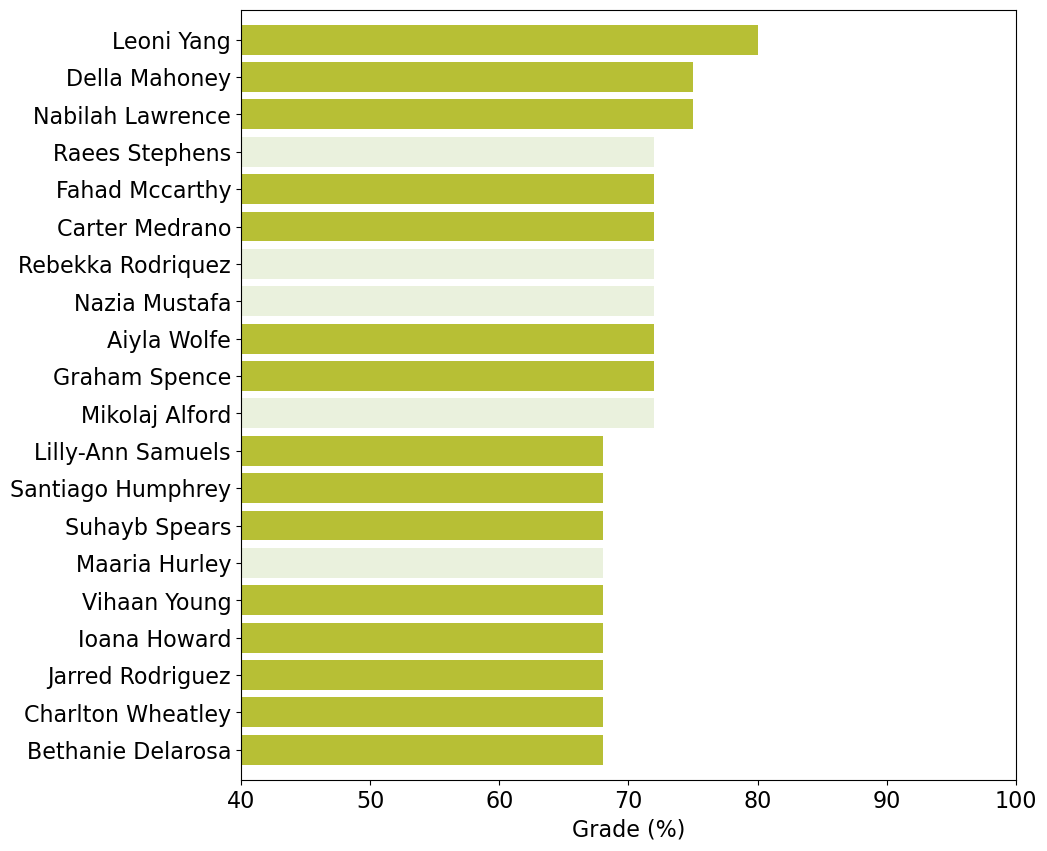

In [21]:
def _view(table, k=10):
    # Sort all records by assigned mark
    view = sorted(table, key=lambda lst: lst[2])
    # Get top-k records
    view = view[-k:]
    # Extract student names
    names = [row[0] for row in view]
    # Extract student level
    level = [row[1] for row in view]
    # Extract student mark
    marks = [row[2] for row in view]
    
    return names, marks, level


# Find the top-20 students
K = 20
names, marks, level = _view(table, k=K)

figure, axes = plt.subplots(figsize=(10, 10))

# Configure the x-axis
axes.set_xlim(40, 100)
axes.set_xticks([40, 50, 60, 70, 80, 90, 100])
axes.set_xlabel('Grade (%)')

# Configure the y-axis
axes.set_ylim(-.8, K - 1 + .8)

# Create a bar chart
axes.barh(names,
          marks,
          align='center', 
          color=['#EAF1DD' if lvl == '4' else '#B7BF35' for lvl in level],
          edgecolor=None);

#### Creating a histogram

Modify function _view to prepare the data for plotting it as a histogram now.

TIP: See https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

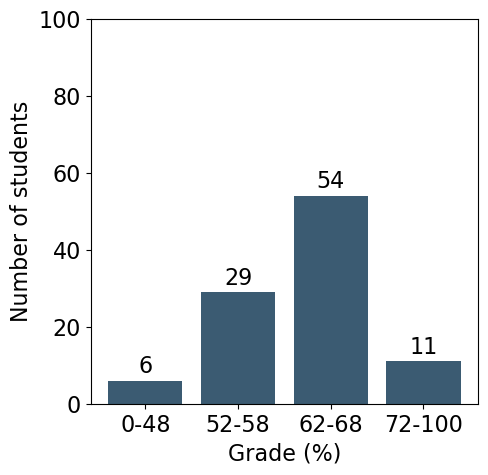

In [22]:
def _view(table):
    
    #this array will eventually hold all the histogram values for plotting them
    ht = { '0-48' : 0, '52-58' : 0, '62-68' : 0, '72-100': 0 }
    
    #nested function i.e. fuction inside a function
    def _incadd(v, s):
        """
        """
        #remove symbol '-'
        t = s.split('-')
        #convert into int and assign to variables
        a = int(t[0])
        #variable a is the left range limit for the grades
        b = int(t[1])
        #variable b is the right range limit for the grades
        
        #check that mark is within the range limits
        within = a <= v <= b
        if within:
            ht[s] += 1
        return within
    
    for row in table:
        mark = row[2]
        result = [_incadd(mark,   '0-48'), 
                  _incadd(mark,  '52-58'), 
                  _incadd(mark,  '62-68'), 
                  _incadd(mark, '72-100')]
    return ht




ht = _view(table)

figure, axes = plt.subplots(figsize=(5, 5))

# Label the x-axis
axes.set_xlabel('Grade (%)')

# Label the y-axis
axes.set_ylabel('Number of students')
# Set y-axis plot limits and axis steps
axes.set_ylim(0, 100)
axes.set_yticks([0, 20, 40, 60, 80, 100])

# Create a bar chart
axes.bar(ht.keys(),
         ht.values(),
         align='center',
         width=0.8,
         edgecolor=None,
         color='#3B5B72')

# Annotate the bars
for p in axes.patches:
    x = p.get_x() + p.get_width()  / 2
    y = p.get_y() + p.get_height() + 2
    value = '{:d}'.format(p.get_height())
    axes.text(x, y, value, ha='center')

#### Exercise 2C - An analysis per grading criterion

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

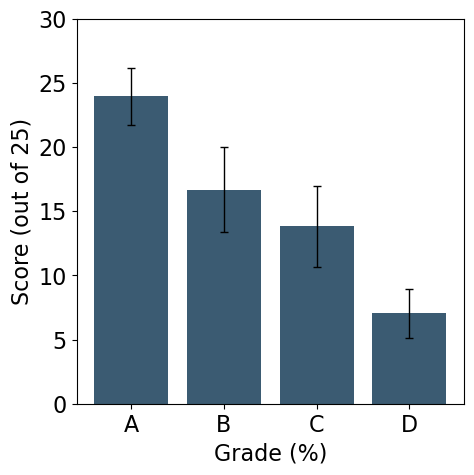

In [23]:
import numpy as np


def _view(table):

    A = [row[-4] for row in table]
    B = [row[-3] for row in table]
    C = [row[-2] for row in table]
    D = [row[-1] for row in table]

    criteria = ['A', 'B', 'C', 'D']
    mu       = [np.mean(A), np.mean(B), np.mean(C), np.mean(D)]
    sigma    = [np.std(A), np.std(B), np.std(C), np.std(D)]
    
    return criteria, mu, sigma


criteria, mu, sigma = _view(table)


figure, axes = plt.subplots(figsize=(5, 5))

# Configure the x-axis
axes.set_xlabel('Grade (%)')

# Configure the y-axis
axes.set_ylabel('Score (out of 25)')
axes.set_ylim(0, 30)
axes.set_yticks([0, 5, 10, 15, 20, 25, 30])

# Create a bar chart
axes.bar(criteria,
         mu,
         yerr=sigma,
         align='center',
         width=0.8,
         edgecolor=None,
         error_kw=dict(lw=1, capsize=3, capthick=1),
         color='#3B5B72');